In [2]:
import numpy as np
import sklearn as sk
import matplotlib.pylab as plt
import matplotlib as mpl

In [3]:
mpl.rc('font', family='NanumGothic')
mpl.rc('axes', unicode_minus=False)

## Scikit-Learn의 SVM

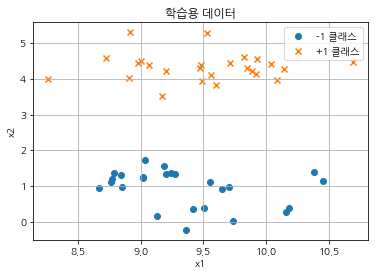

In [5]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, cluster_std=0.5, random_state=4)
y = 2 * y - 1

plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o', label="-1 클래스")
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x', label="+1 클래스")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("학습용 데이터")
plt.grid(True)
plt.show()

In [ ]:
SVC(kernel='linear', C=1e10)

In [7]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1e10).fit(X, y)

- n_support_: 각 클래스의 서포트의 개수

- support_: 각 클래스의 서포트의 인덱스

- support_vectors_: 각 클래스의 서포트의 x 값. x+와 x−

- coef_: w 벡터

- intercept_: −w0

- dual_coef_: 각 원소가 ai⋅yi로 이루어진 벡터

In [8]:
model.n_support_

array([1, 1])

In [9]:
model.support_

array([42,  1])

In [10]:
model.support_vectors_

array([[9.03715314, 1.71813465],
       [9.17124955, 3.52485535]])

In [11]:
y[model.support_]

array([-1,  1])

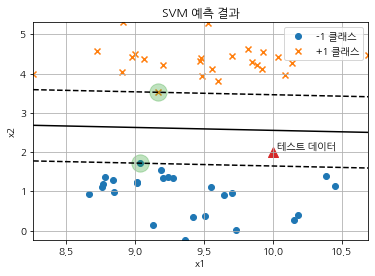

In [13]:
xmin = X[:, 0].min()
xmax = X[:, 0].max()
ymin = X[:, 1].min()
ymax = X[:, 1].max()
xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy)

Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = model.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1, 0, 1]
linestyles = ['dashed', 'solid', 'dashed']
plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o', label="-1 클래스")
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x', label="+1 클래스")
plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, alpha=0.3)

x_new = [10, 2]
plt.scatter(x_new[0], x_new[1], marker='^', s=100)
plt.text(x_new[0] + 0.03, x_new[1] + 0.08, "테스트 데이터")

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(True)
plt.title("SVM 예측 결과")

plt.show()

In [14]:
x_new = [10, 2]
model.decision_function([x_new])

array([-0.61101582])